# REGRESI LINEAR SEDERHANA

### Bermain dengan Data Sembarang

In [3]:
import numpy as np #untuk perhitungan saintifik
import matplotlib.pyplot as plt #untuk plotting
from sklearn.linear_model import LinearRegression #import library LinearRegression dari sc

In [4]:
penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

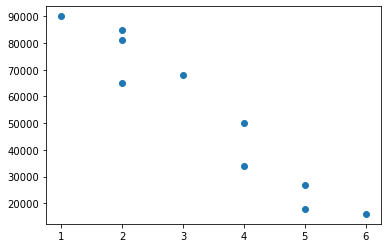

In [5]:
%matplotlib inline
plt.scatter (penjualan, harga)

In [6]:
penjualan = penjualan.reshape (-1,1)

In [20]:
linreg = LinearRegression()
linreg.fit(penjualan, harga)

LinearRegression()

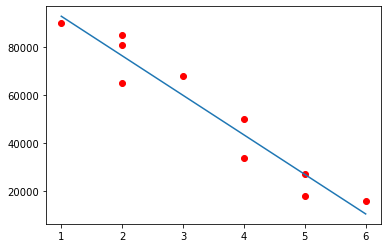

In [8]:
plt.scatter(penjualan, harga, color='red')
plt.plot(penjualan, linreg.predict(penjualan))

### Bermain dengan Dataset

In [9]:
import pandas as pd #untuk dataframe
import pylab as pl #untuk plotting
%matplotlib inline

In [10]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-10-04 19:19:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70% 84,6K 0s
    50K .......... ..........                                 100% 7,14M=0,6s

2022-10-04 19:19:12 (119 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [11]:
df = pd.read_csv("FuelConsumption.csv")

In [12]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


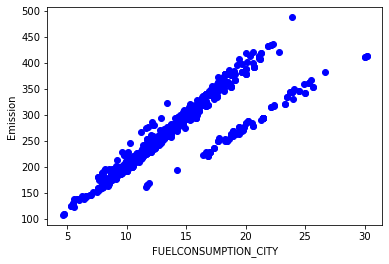

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()

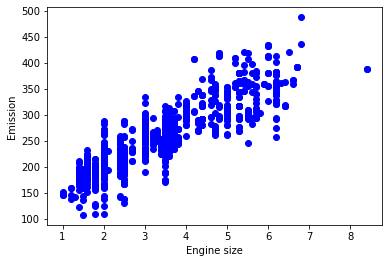

In [15]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Melakukan Data Splitting

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

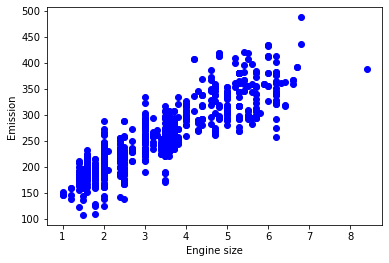

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Membuat Model Regresi

In [18]:
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

LinearRegression()

In [21]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.47025832]]
Intercept:  [124.66535301]


Text(0, 0.5, 'Emission')

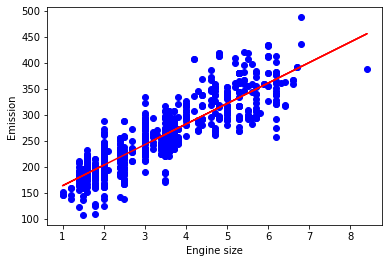

In [22]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [23]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.47
Residual sum of squares (MSE): 978.99
R2-score: 0.69
